In [16]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [22]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from datetime import datetime
import time

def datamanipulation(participant):
    ptp = participant

    path_data = "../Data/Experiment Data/" + ptp +"/"
    path_analysis = "../Data/Experiment Analysis/" + ptp + "/"

    responsData = pd.read_csv(path_data + "Responses.csv")
    experimentData = pd.read_csv(path_data + "Classification.csv")
    #display(responsData)
    #display(experimentData)
    #display(responsData.StartTime[0:1])
    start_time = pd.to_datetime(responsData.StartTime[0:1],format='%H:%M:%S').dt.time
    end_time = pd.to_datetime(responsData.ResponseTime[0:1],format='%H:%M:%S').dt.time
    #display(start_time)
    #display(end_time)
    clock_time = pd.to_datetime(experimentData["System_Time"],format='%H:%M:%S').dt.time
    #display(clock_time)
    frame = []
    frameAvg = []
    frameAvgRest = []

    framefpr = []
    #framefprRest = []
    for index, row in responsData.iterrows():
        Id,CelebrityName,VideoType,Response,ParticipantId,ResponseTime,VideoId,StartTime,FamId,SeenBefore,TimeSpent,Confusion,Correction = row

        #percentage of frequecny
        pfrDIS = 0 
        pfrSO = 0
        pfrLENG = 0
        pfrHENG = 0

        #display(ApplicationName)
        #display(responsData.Start_Time[index])
        start_time = pd.to_datetime(responsData.StartTime[index:index+1],format='%H:%M:%S').dt.time
        #end_time = start_time + 
        end_time = pd.to_datetime(responsData.ResponseTime[index:index+1],format='%H:%M:%S').dt.time

        mask = (clock_time < end_time[index]) & (clock_time >= start_time[index]) 

        data = experimentData[mask]    
        data["ResponseId"] = Id
        data["CelebrityName"] = CelebrityName
        data["VideoType"] = VideoType
        data["Response"] = Response
        data["ParticipantId"] = ParticipantId
        data["ResponseTime"] = ResponseTime
        data["VideoId"] = VideoId
        data["StartTime"] = StartTime
        data["FamiliarizationId"] = FamId
        data["TimeSpent"] = TimeSpent
        data["Confusion"] = Confusion
        data["Correction"] = Correction
        #data["SeenBefore"] == seenBefore
        count = 0
        #display(data)
        for i,row2 in data.iterrows():

            so = row2["ProbSleepOnset"]
            dis = row2["ProbDistraction"]
            leng = row2["ProbLowEng"]
            heng = row2["ProbHighEng"]
            max_value = max(so,dis,leng,heng)
            if (max_value == 0):
                continue
            else:
                if(so == max_value) & (so != -99999) & (so != 0):
                    pfrSO = pfrSO + 1
                if(dis == max_value )& (dis != -99999) & (dis != 0):
                    pfrDIS = pfrDIS + 1
                if(leng == max_value )& (leng != -99999) & (leng != 0):
                    pfrLENG = pfrLENG + 1
                if(heng==max_value) & (heng != -99999) & (heng != 0):
                    pfrHENG = pfrHENG + 1

                count = count +1

        try:
            data["pfrSO"] = pfrSO/count
            data["pfrDIS"] = pfrDIS/count
            data["pfrLENG"] = pfrLENG/count
            data["pfrHENG"] = pfrHENG/count
            data["pfrENG"] = (pfrLENG/count) + (pfrHENG/count)
        except ZeroDivisionError:
            continue


        pfrData = data[['Elapsed Time','CelebrityName','VideoType','TimeSpent','pfrSO','pfrDIS','pfrLENG','pfrHENG','pfrENG','VideoId','ParticipantId','Confusion','Correction']]    

        data.loc['Avg'] = data[['CelebrityName','VideoType','TimeSpent','pfrSO','pfrDIS','pfrLENG','pfrHENG','pfrENG','VideoId','ParticipantId','Confusion','Correction']].mean(axis=0,numeric_only=True).round(2)



        if not (data.empty):
            frame.append(data)        
            frameAvg.append(data.tail(1))
            framefpr.append(pfrData.tail(1))

    #result = pd.concat(frame)
    #result2 = pd.concat(frameAvg)
    result3 = pd.concat(framefpr)
    #display(result)
    return result3


    
    #display(result2)
    #display(result3)
    #result.to_csv(path_analysis+"FirstData_"+ptp+".csv", index = False)
    #result2.to_csv(path_analysis+"TrialAvg_"+ptp+".csv", index = False)
    #result3.to_csv(path_analysis+"CogFreqAvg_VideoId_"+ptp+".csv",index = False)




    print("Done!")

In [ ]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import time

def RawDataProcess(participant):
    ptp = participant
    #ptp = "2001_0"

    path_data = "../Data/Experiment Data/" + ptp +"/"
    path_analysis = "../Data/Experiment Analysis/" + ptp + "/"

    responsData = pd.read_csv(path_data + "Responses.csv")
    experimentData = pd.read_csv(path_data + ptp.replace("_","") + "0000_Ref_Raw.csv")
    #display(responsData)
    #display(experimentData)
    start_time = pd.to_datetime(responsData.StartTime[0:1],format='%H:%M:%S').dt.time
    end_time = pd.to_datetime(responsData.ResponseTime[0:1],format='%H:%M:%S').dt.time
    #display(start_time)
    #display(end_time)
    #print(experimentData["Clock Time")
    clock_time = pd.to_datetime(experimentData["Clock Time"],format='%H:%M:%S:%f').dt.time
    #display(clock_time)
    frame = []
    avg_frame = []
    for index, row in responsData.iterrows():
        Id,CelebrityName,VideoType,Response,ParticipantId,ResponseTime,VideoId,StartTime,FamId,SeenBefore,TimeSpent,Confusion,Correction = row
        #display(ApplicationName)
        #display(responsData.Start_Time[index])
        start_time = pd.to_datetime(responsData.StartTime[index:index+1],format='%H:%M:%S').dt.time
        end_time = pd.to_datetime(responsData.ResponseTime[index:index+1],format='%H:%M:%S').dt.time

        mask = (clock_time < end_time[index]) & (clock_time >= start_time[index]) 

        data = experimentData[mask]
        data.loc['Avg'] = data.mean(axis=0,numeric_only=True).round(2)
        data["ResponseId"] = Id
        data["CelebrityName"] = CelebrityName
        data["VideoType"] = VideoType
        data["Response"] = Response
        data["ParticipantId"] = ParticipantId
        data["ResponseTime"] = ResponseTime
        data["VideoId"] = VideoId
        data["StartTime"] = StartTime
        data["FamiliarizationId"] = FamId
        data["TimeSpent"] = TimeSpent
        data["Confusion"] = Confusion
        data["Correction"] = Correction
        
        



        if not (data.empty):
            frame.append(data.head(len(data.index)-1))
            avg_frame.append(data.tail(1))
    result = pd.concat(frame)
    avg_result = pd.concat(avg_frame)
    
    return result,avg_result

In [ ]:
alike_fake = []
alike_real = []
fam_fake = []
fam_real = []
bfam_fake = []
bfam_real = []
avg_df = []
df = []
path_analysis = "../Data/Experiment Analysis/RawData/"
participants = ["2001_0","2003_0","2004_0","2005_0","2006_0","2007_0","2009_0","2010_0","2011_0","2013_0","2014_0","2016_0","2017_0","2019_0","2020_0","2021_0","2022_0","2023_0","2024_0","2025_0"]
#participants = ["2001_0"]
for p in participants:
    data,avg_data = RawDataProcess(p)
    df.append(data)
    avg_df.append(avg_data)
    #print(avg_data)
    #alike_fake.append(data[data["VideoType"] == "ALIKE_FAKE"])
    #alike_real.append(data[data["VideoType"] == "ALIKE_REAL"])
    #fam_fake.append(data[data["VideoType"] == "CELEBRITY_FAKE"])
    #fam_real.append(data[data["VideoType"] == "CELEBRITY_REAL"])
    #bfam_fake.append(data[data["VideoType"] == "NONCELEBRITY_FAKE"])
    #bfam_real.append(data[data["VideoType"] == "NONCELEBRITY_REAL"])
    print(p + " is done!")
result = pd.concat(df)
result_avg = pd.concat(avg_df)
#print(result)
#print(result_avg)
#result2 = pd.concat(alike_fake)
#result3 = pd.concat(alike_real)
#result4 = pd.concat(fam_fake)
#result5 = pd.concat(fam_real)
#result6 = pd.concat(bfam_fake)
#result7 = pd.concat(bfam_real)
#display(result3)
#display(result2.tail(10))
#display(result5.tail(10))

result.to_csv(path_analysis+"New_ALL_Ref_RAW.csv", index = False)
result_avg.to_csv(path_analysis+"New_AVG_Ref_RAW.csv", index = False)
#result2.to_csv(path_analysis+"ALIKE_FAKE_RAWDATA.csv", index = False)
#result3.to_csv(path_analysis+"ALIKE_REAL_RAWDATA.csv", index = False)
#result4.to_csv(path_analysis+"FAM_FAKE_RAWDATA.csv", index = False)
#result5.to_csv(path_analysis+"FAM_REAL_RAWDATA.csv", index = False)
#result6.to_csv(path_analysis+"BFAM_FAKE_RAWDATA.csv", index = False)
#result7.to_csv(path_analysis+"BFAM_REAL_RAWDATA.csv", index = False)

In [51]:
participants = ["2001_0","2003_0","2004_0","2005_0","2006_0","2007_0","2009_0","2010_0","2011_0","2013_0","2014_0","2016_0","2017_0","2019_0","2020_0","2021_0","2022_0","2023_0","2024_0","2025_0"]
#participants = ["2001_0","2003_0"]
frame = []
fake_as_fake = []
fake_as_real = []
real_as_fake = []
real_as_real = []

path_analysis = "../Data/Experiment Analysis/Cognitive/"
for p in participants:
    result = datamanipulation(p)
    #display(result)
    frame.append(result)
    print(p + " is done!")
#display(frame)    
result2 = pd.concat(frame)
display(result2)
#result2.to_csv(path_analysis+"CognitiveData_ALL_Users_new.csv", index = False)

    



C:\Users\cagri\AppData\Local\Temp/ipykernel_22024/764167377.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ResponseId"] = Id
C:\Users\cagri\AppData\Local\Temp/ipykernel_22024/764167377.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CelebrityName"] = CelebrityName
C:\Users\cagri\AppData\Local\Temp/ipykernel_22024/764167377.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

2001_0 is done!
2003_0 is done!
2004_0 is done!
2005_0 is done!
2006_0 is done!
2007_0 is done!
2009_0 is done!
2010_0 is done!
2011_0 is done!
2013_0 is done!
2014_0 is done!
2016_0 is done!
2017_0 is done!
2019_0 is done!
2020_0 is done!
2021_0 is done!
2022_0 is done!
2023_0 is done!
2024_0 is done!
2025_0 is done!


,Elapsed Time,CelebrityName,VideoType,TimeSpent,pfrSO,pfrDIS,pfrLENG,pfrHENG,pfrENG,VideoId,ParticipantId,Confusion,Correction
297,00:04:57:000,Donald Trump,CELEBRITY_FAKE,0:00:21,0.095238,0.095238,0.761905,0.047619,0.809524,237.0,11.0,FAKE AS REAL,False
310,00:05:10:000,Donald Trump,CELEBRITY_REAL,0:00:13,0.000000,0.000000,0.615385,0.384615,1.000000,234.0,11.0,REAL AS FAKE,False
328,00:05:28:000,Donald Trump,CELEBRITY_FAKE,0:00:18,0.000000,0.000000,0.888889,0.111111,1.000000,238.0,11.0,FAKE AS FAKE,True
346,00:05:46:000,Donald Trump,CELEBRITY_REAL,0:00:18,0.000000,0.055556,0.666667,0.277778,0.944444,229.0,11.0,REAL AS FAKE,False
372,00:06:12:000,Donald Trump,CELEBRITY_REAL,0:00:26,0.000000,0.115385,0.615385,0.269231,0.884615,230.0,11.0,REAL AS REAL,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,00:18:31:000,Person2,NONCELEBRITY_FAKE,0:00:06,0.000000,0.000000,0.000000,1.000000,1.000000,271.0,35.0,FAKE AS FAKE,True
1118,00:18:38:000,Person2,NONCELEBRITY_REAL,0:00:07,0.000000,0.142857,0.142857,0.714286,0.857143,261.0,35.0,REAL AS REAL,True
1126,00:18:46:000,Person2,NONCELEBRITY_REAL,0:00:08,0.000000,0.000000,0.250000,0.750000,1.000000,262.0,35.0,REAL AS REAL,True
1132,00:18:52:000,Person2,NONCELEBRITY_REAL,0:00:06,0.000000,0.166667,0.000000,0.833333,0.833333,263.0,35.0,REAL AS REAL,True


In [32]:
display(result2)

,Elapsed Time,CelebrityName,VideoType,TimeSpent,pfrSO,pfrDIS,pfrLENG,pfrHENG,pfrENG,VideoId,ParticipantId,Confusion,Correction
297,00:04:57:000,Donald Trump,CELEBRITY_FAKE,0:00:21,0.095238,0.095238,0.761905,0.047619,0.809524,237.0,11.0,FAKE AS REAL,False
310,00:05:10:000,Donald Trump,CELEBRITY_REAL,0:00:13,0.000000,0.000000,0.615385,0.384615,1.000000,234.0,11.0,REAL AS FAKE,False
328,00:05:28:000,Donald Trump,CELEBRITY_FAKE,0:00:18,0.000000,0.000000,0.888889,0.111111,1.000000,238.0,11.0,FAKE AS FAKE,True
346,00:05:46:000,Donald Trump,CELEBRITY_REAL,0:00:18,0.000000,0.055556,0.666667,0.277778,0.944444,229.0,11.0,REAL AS FAKE,False
372,00:06:12:000,Donald Trump,CELEBRITY_REAL,0:00:26,0.000000,0.115385,0.615385,0.269231,0.884615,230.0,11.0,REAL AS REAL,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,00:22:36:000,Barack Obama,ALIKE_REAL,0:00:15,0.400000,0.066667,0.200000,0.333333,0.533333,251.0,13.0,REAL AS REAL,True
1372,00:22:52:000,Donald Trump,ALIKE_FAKE,0:00:08,0.125000,0.125000,0.625000,0.125000,0.750000,248.0,13.0,FAKE AS FAKE,True
1378,00:22:58:000,Donald Trump,ALIKE_FAKE,0:00:06,0.000000,0.000000,0.500000,0.500000,1.000000,249.0,13.0,FAKE AS FAKE,True
1388,00:23:08:000,Donald Trump,ALIKE_REAL,0:00:10,0.400000,0.100000,0.200000,0.300000,0.500000,256.0,13.0,REAL AS REAL,True


In [20]:
pfrSO = result2["pfrSO"]

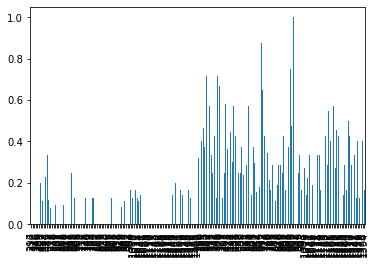

In [21]:
SO_plot = pfrSO.plot(kind="bar")

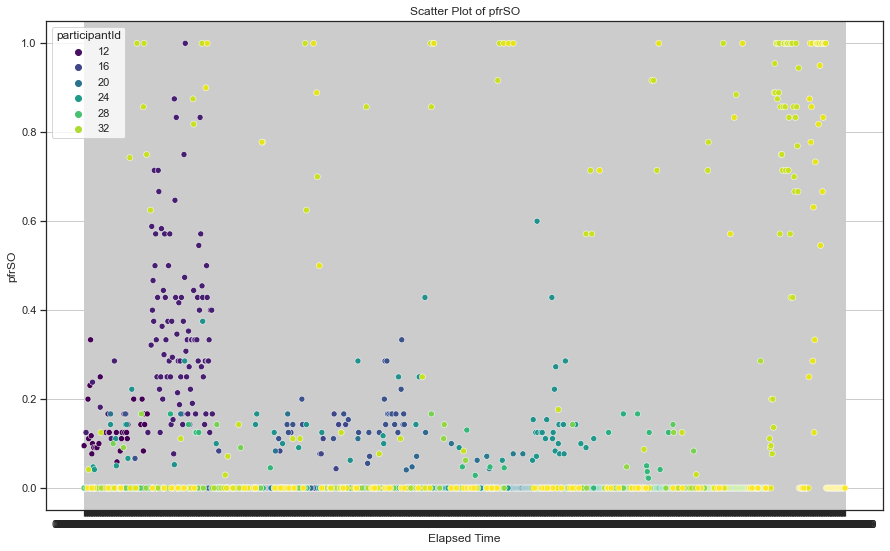

In [53]:
plt.figure(figsize=(15, 9))
sns.scatterplot(data=result2, x='Elapsed Time', y='pfrSO', hue='ParticipantId', palette='viridis')
plt.title('Scatter Plot of pfrSO')
plt.xlabel('Elapsed Time')
plt.ylabel('pfrSO')
plt.legend(title='participantId')
plt.grid(True)
plt.show()

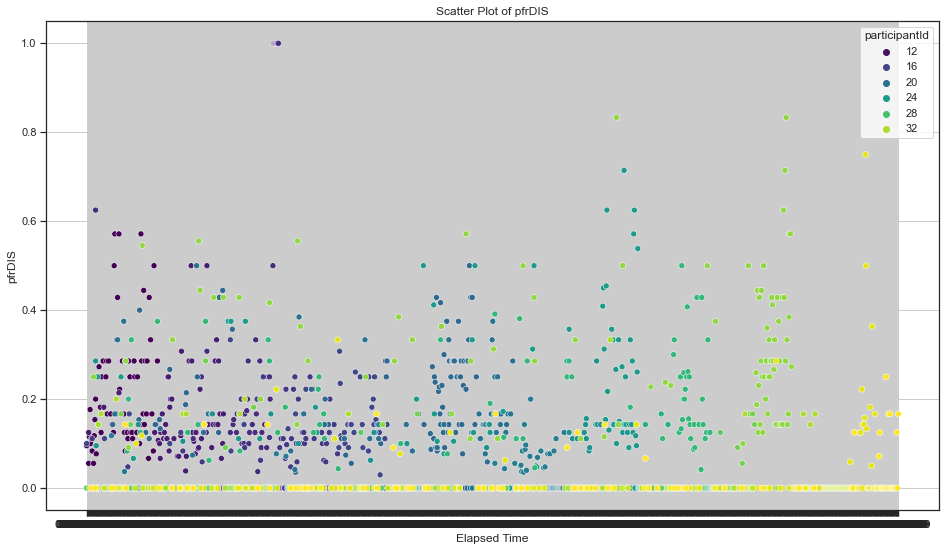

In [54]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=result2, x='Elapsed Time', y='pfrDIS', hue='ParticipantId', palette='viridis')
plt.title('Scatter Plot of pfrDIS')
plt.xlabel('Elapsed Time')
plt.ylabel('pfrDIS')
plt.legend(title='participantId')
plt.grid(True)
plt.show()

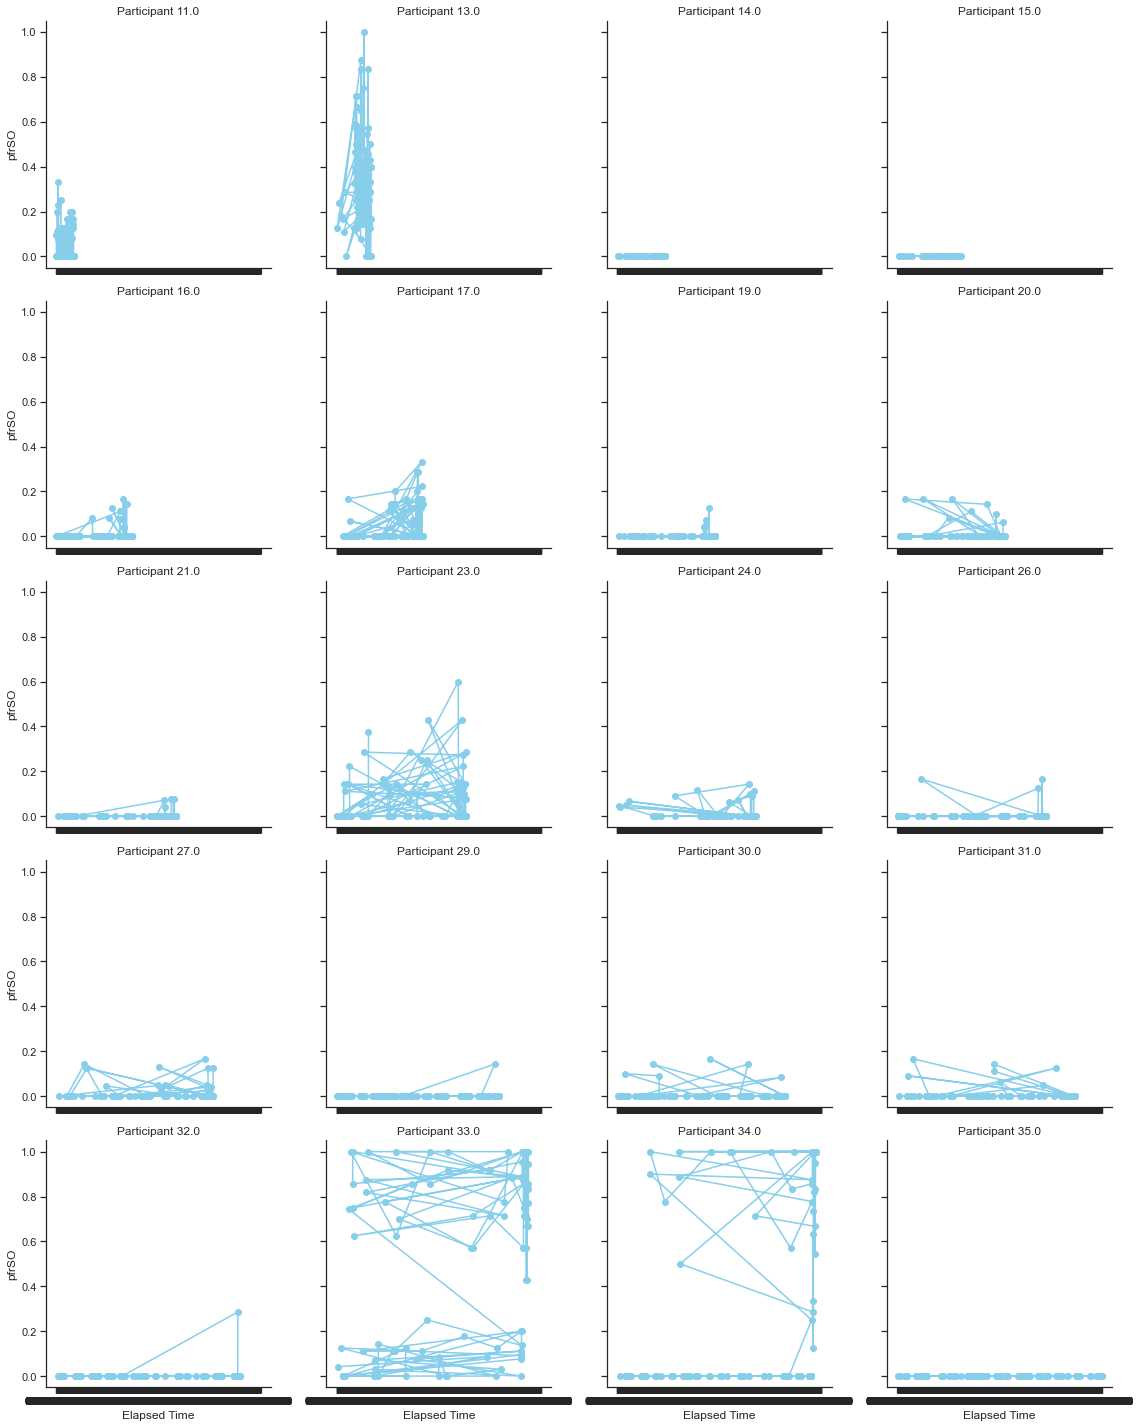

In [55]:
sns.set(style="ticks")
g = sns.FacetGrid(result2, col="ParticipantId", col_wrap=4, height=4)
g.map(plt.plot, "Elapsed Time", "pfrSO", marker="o", color="skyblue")
g.set_axis_labels("Elapsed Time", "pfrSO")
g.set_titles("Participant {col_name}")
plt.show()

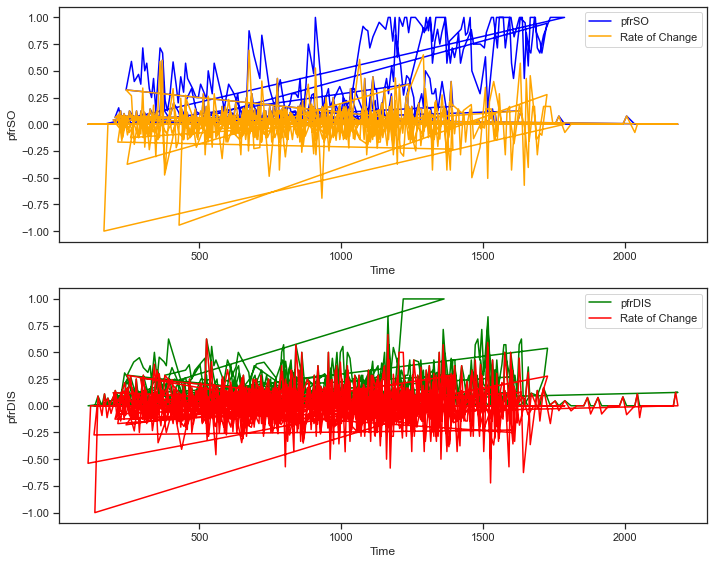

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data stored in a DataFrame named df
# Replace df with your actual DataFrame name
df = pd.DataFrame(result2)

# Calculate the derivative (rate of change) for pfrSO and pfrDIS values
df['pfrSO_rate'] = df['pfrSO'].diff()  # Calculate the difference between consecutive values
df['pfrDIS_rate'] = df['pfrDIS'].diff()

# Plot the original values and their rates of change
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot pfrSO values and their rate of change
axes[0].plot(df.index, df['pfrSO'], label='pfrSO', color='blue')
axes[0].plot(df.index, df['pfrSO_rate'], label='Rate of Change', color='orange')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('pfrSO')
axes[0].legend()

# Plot pfrDIS values and their rate of change
axes[1].plot(df.index, df['pfrDIS'], label='pfrDIS', color='green')
axes[1].plot(df.index, df['pfrDIS_rate'], label='Rate of Change', color='red')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('pfrDIS')
axes[1].legend()

plt.tight_layout()
plt.show()

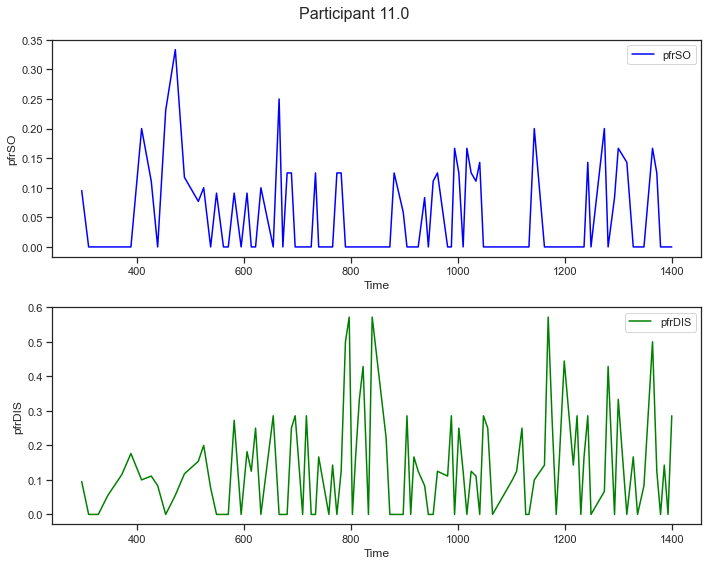

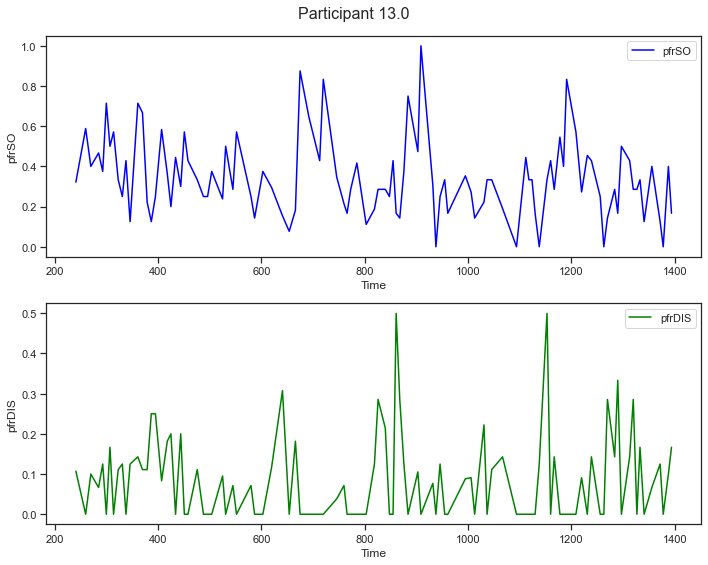

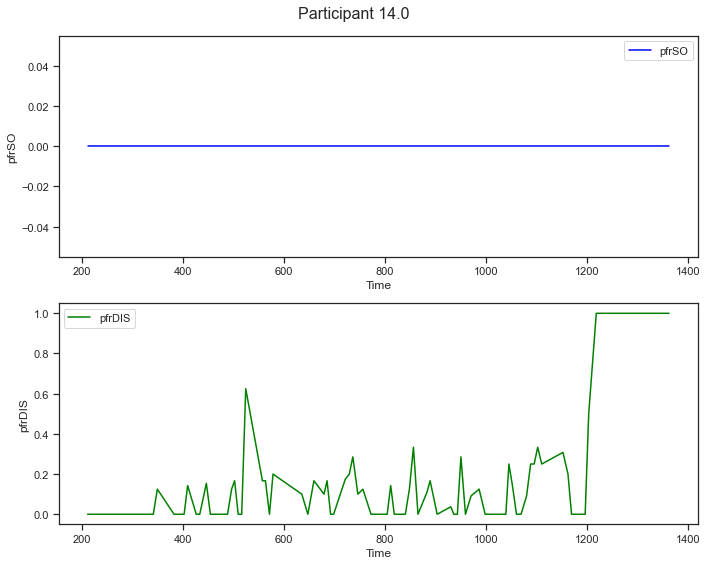

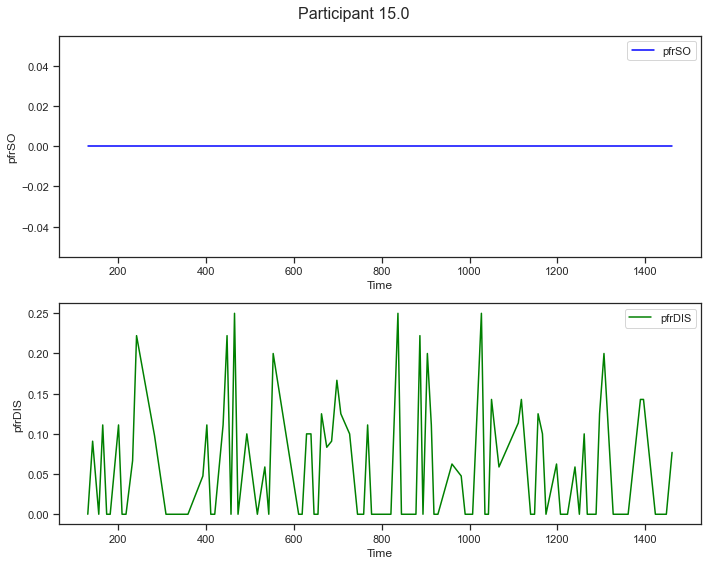

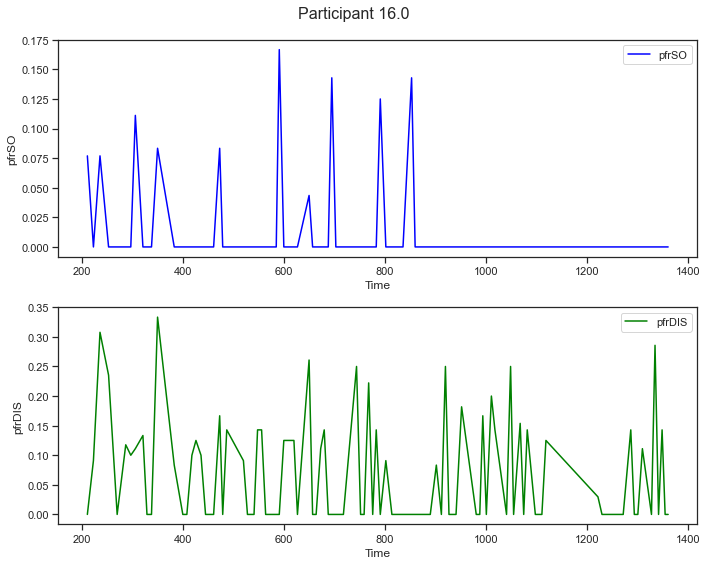

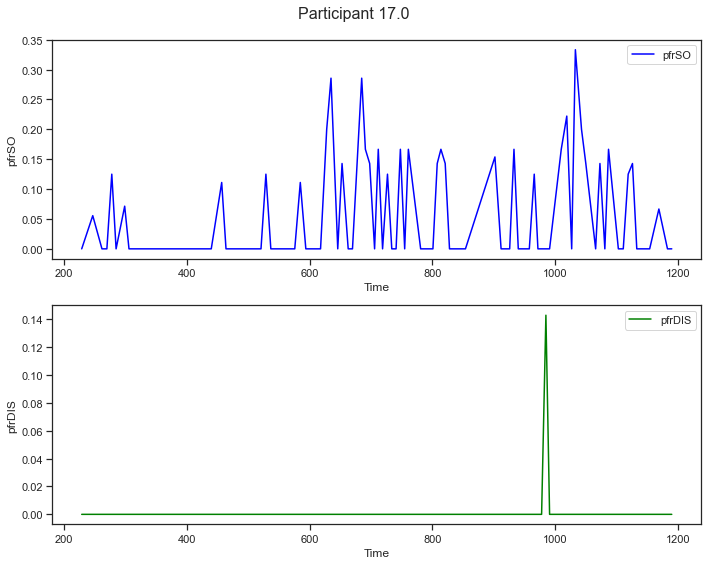

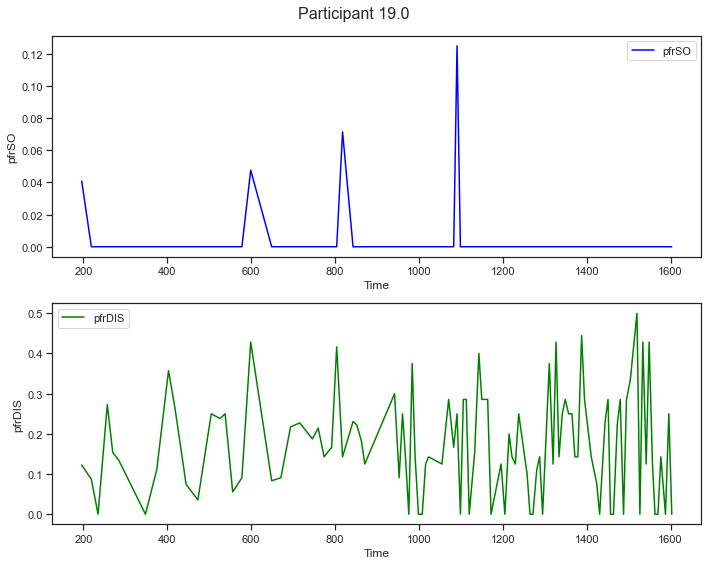

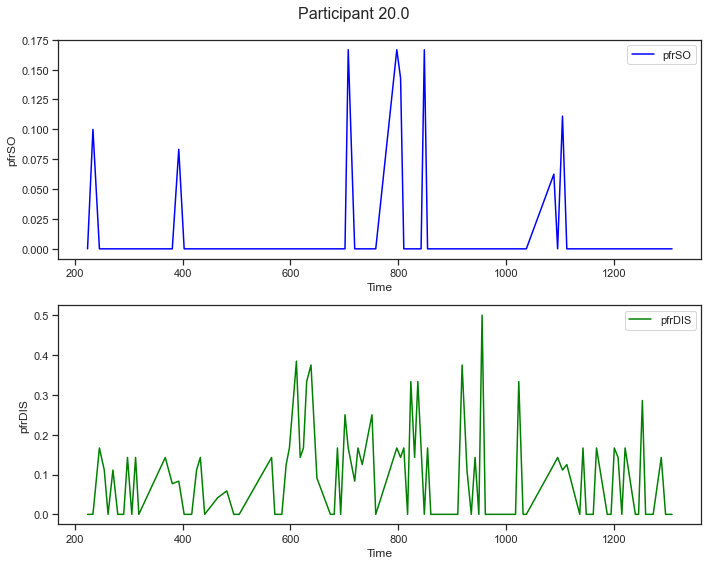

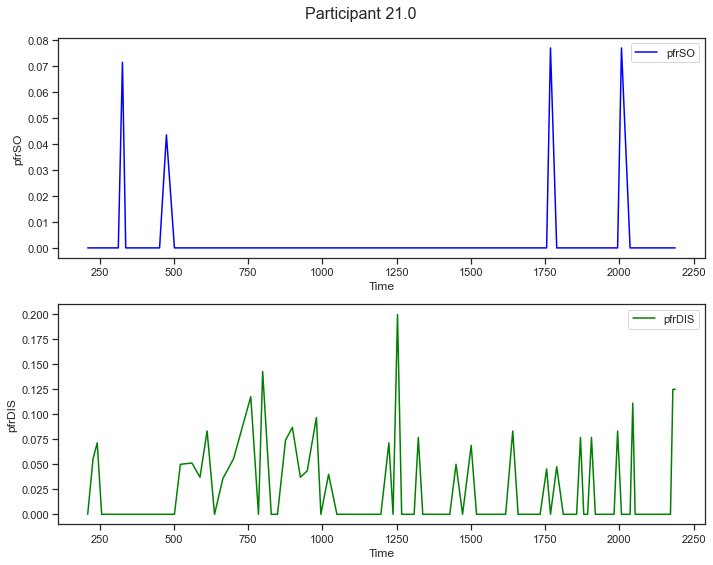

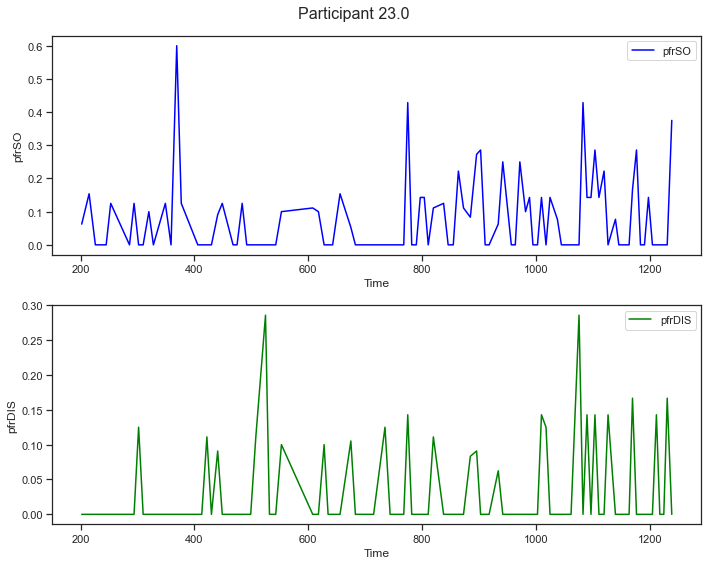

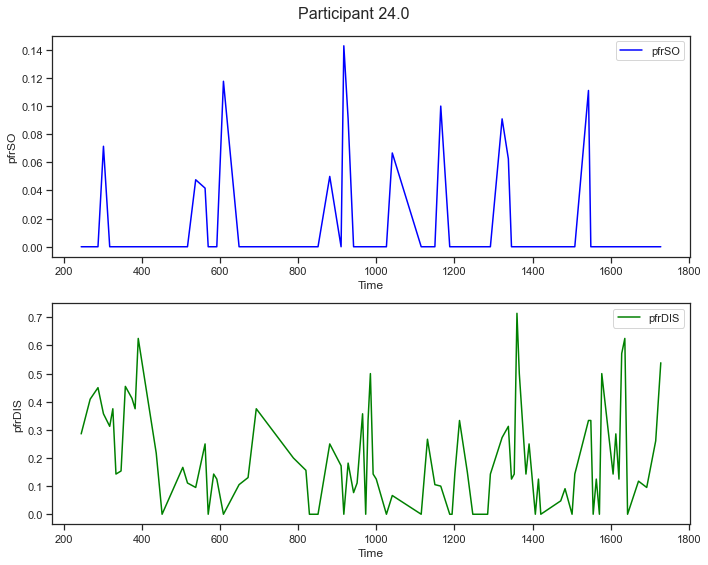

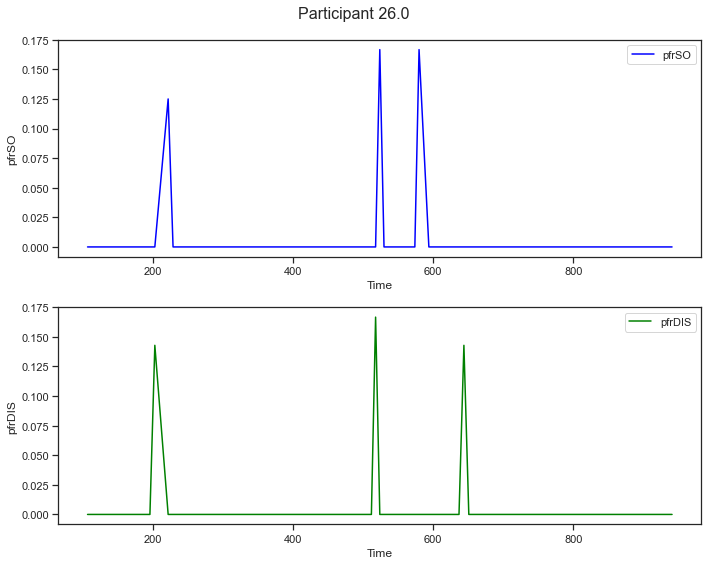

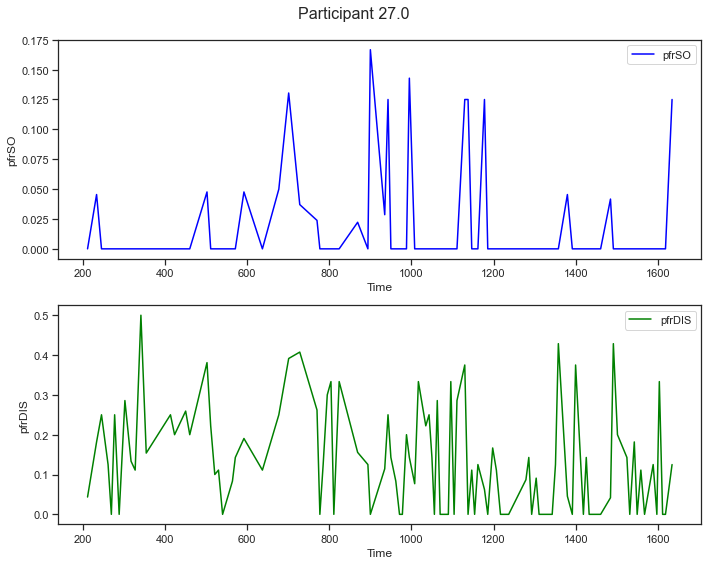

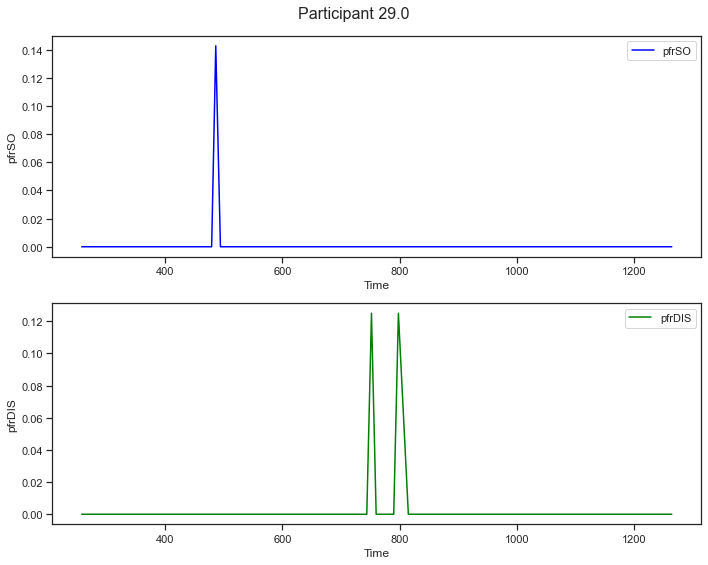

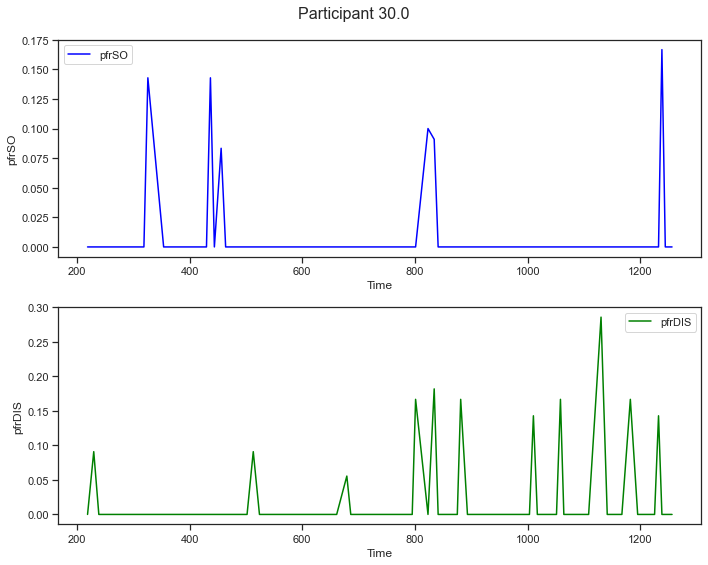

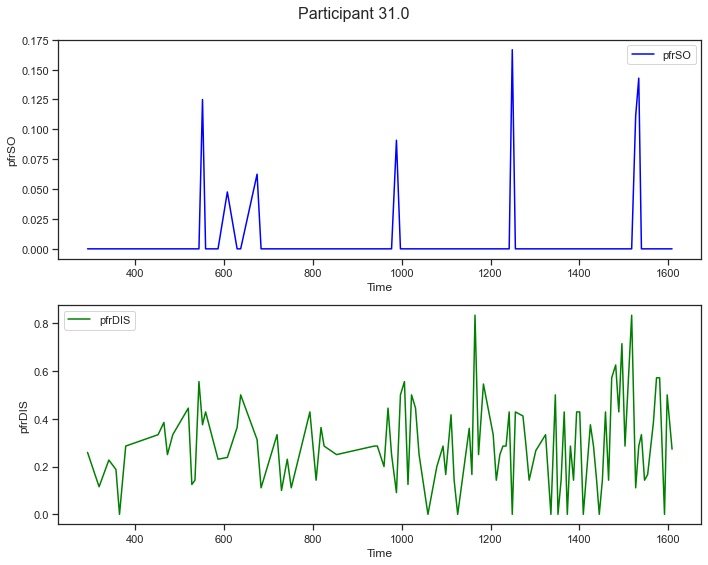

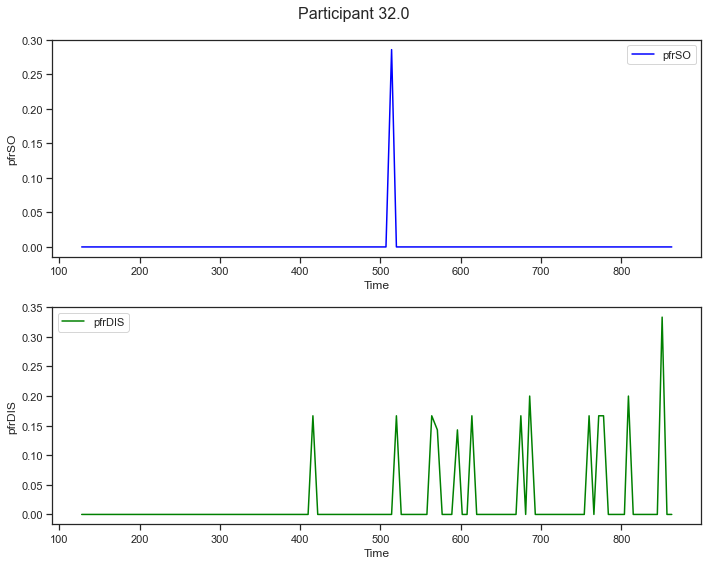

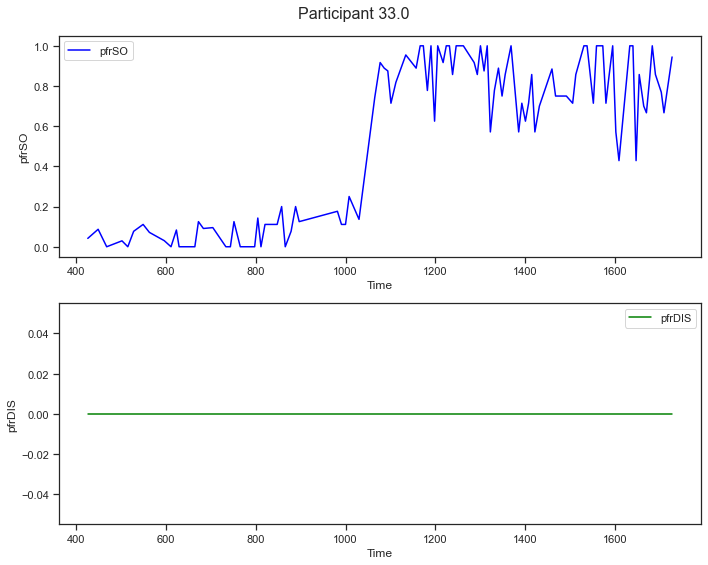

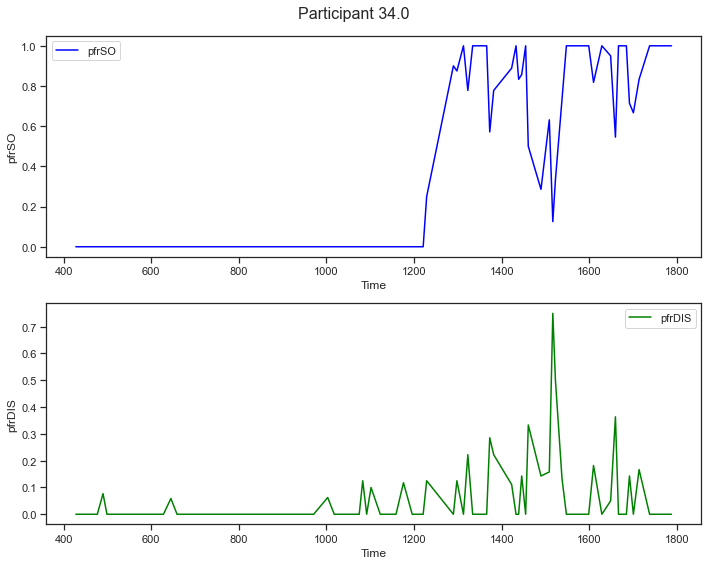

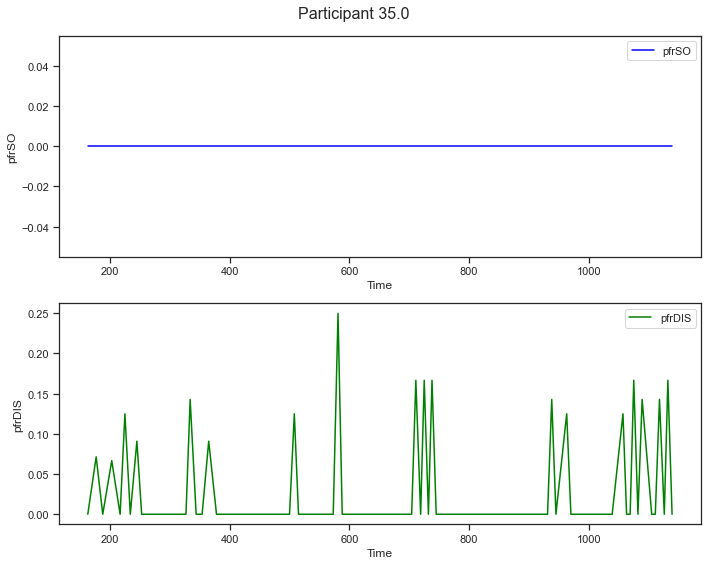

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data stored in a DataFrame named df
# Replace df with your actual DataFrame name

# Calculate the derivative (rate of change) for pfrSO and pfrDIS values for each participant
# Group the DataFrame by ParticipantId and calculate the difference for each group
df['pfrSO_rate'] = df.groupby('ParticipantId')['pfrSO'].diff()
df['pfrDIS_rate'] = df.groupby('ParticipantId')['pfrDIS'].diff()

# Plot the original values and their rates of change for each participant
participants = df['ParticipantId'].unique()

for participant in participants:
    participant_data = df[df['ParticipantId'] == participant]
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Plot pfrSO values and their rate of change for the current participant
    axes[0].plot(participant_data.index, participant_data['pfrSO'], label='pfrSO', color='blue')
    #axes[0].plot(participant_data.index, participant_data['pfrSO_rate'], label='Rate of Change', color='orange')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('pfrSO')
    axes[0].legend()

    # Plot pfrDIS values and their rate of change for the current participant
    axes[1].plot(participant_data.index, participant_data['pfrDIS'], label='pfrDIS', color='green')
    #axes[1].plot(participant_data.index, participant_data['pfrDIS_rate'], label='Rate of Change', color='red')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('pfrDIS')
    axes[1].legend()

    fig.suptitle(f'Participant {participant}', fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
participants = ["1003_0","1004_0","1005_0","1006_1","1007_2","1008_0","1009_0","1010_0","1011_0","1012_0","1013_0","1015_0","1017_0","1018_0","1019_1","1020_0","1021_0","1022_0","1023_0","1024_0"]
frame = []
path_analysis = "../Data/Experiment Analysis/"
for p in participants:
    data = datamanipulation2(p)    
    frame.append(data)
    print(p + " is done!")
    
result = pd.concat(frame)
path_data = "../Experiment Analysis/All Participants/"
result.to_csv(path_analysis+"All_CogState_n20.csv", index = False)


In [ ]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
from datetime import datetime, date, timedelta, time

def RawDataProcess(participant):
    ptp = participant
    #print(ptp[:-2])
    #return
    #ptp = "2001_0"

    path_data = "../Data/Experiment Data/" + ptp +"/"
    path_analysis = "../Data/Experiment Analysis/" + ptp + "/"

    responsData = pd.read_csv(path_data + "Responses.csv")
    experimentData = pd.read_csv(path_data + ptp.replace("_","") + "0000_Ref_Raw.csv")
    restTimeData = pd.read_csv("../Data/Experiment Data/RestTime_all.csv")
    #display(restTimeData)
    #return
    #display(responsData)
    #display(restTimeData.EndTime)
    start_time = pd.to_datetime(restTimeData.RestTime[0:1],format='%H:%M:%S').dt.time    
    end_time = pd.to_datetime(restTimeData.EndTime[0:1],format='%H:%M:%S').dt.time
    pId = restTimeData.ParticipantId[0:1]
    
    #display(end_time)
    #display(pId)
    #return
    #print(experimentData["Clock Time")
    clock_time = pd.to_datetime(experimentData["Clock Time"],format='%H:%M:%S:%f').dt.time
    #display(restTimeData)
    frame = []
    avg_frame = []
    for index, row in restTimeData.iterrows():
        Id,restTime,endTime = row
        display(Id)
        display(ptp[:-2])
        #display(responsData.Start_Time[index])
        if(str(Id) == ptp[:-2]):
            start_time = pd.to_datetime(restTimeData.RestTime[index:index+1],format='%H:%M:%S').dt.time
            end_time = pd.to_datetime(restTimeData.EndTime[index:index+1],format='%H:%M:%S').dt.time
            mask = (clock_time < end_time[index]) & (clock_time >= start_time[index]) 
            data = experimentData[mask]                
            data["ParticipantId"] = Id
            data["RestTime"] = restTime
            data["EndTime"] = endTime
            display(data)
        
            if not (data.empty):
                frame.append(data.head(len(data.index)-1))
            #avg_frame.append(data.tail(1))
        else:
            continue
        result = pd.concat(frame)
    #avg_result = pd.concat(avg_frame)
    
    return result

In [ ]:
alike_fake = []
alike_real = []
fam_fake = []
fam_real = []
bfam_fake = []
bfam_real = []
avg_df = []
df = []
path_analysis = "../Data/Experiment Analysis/RawData/"
participants = ["2001_0","2003_0","2004_0","2005_0","2006_0","2007_0","2009_0","2010_0","2011_0","2013_0","2014_0","2016_0","2017_0","2019_0","2020_0","2021_0","2022_0","2023_0","2024_0","2025_0"]
#participants = ["2001_0"]
for p in participants:
    data = RawDataProcess(p)
    df.append(data)
    #avg_df.append(avg_data)
    #print(avg_data)
    #alike_fake.append(data[data["VideoType"] == "ALIKE_FAKE"])
    #alike_real.append(data[data["VideoType"] == "ALIKE_REAL"])
    #fam_fake.append(data[data["VideoType"] == "CELEBRITY_FAKE"])
    #fam_real.append(data[data["VideoType"] == "CELEBRITY_REAL"])
    #bfam_fake.append(data[data["VideoType"] == "NONCELEBRITY_FAKE"])
    #bfam_real.append(data[data["VideoType"] == "NONCELEBRITY_REAL"])
    print(p + " is done!")
result = pd.concat(df)
#result_avg = pd.concat(avg_df)
#print(result)
#print(result_avg)
#result2 = pd.concat(alike_fake)
#result3 = pd.concat(alike_real)
#result4 = pd.concat(fam_fake)
#result5 = pd.concat(fam_real)
#result6 = pd.concat(bfam_fake)
#result7 = pd.concat(bfam_real)
#display(result3)
#display(result2.tail(10))
#display(result5.tail(10))

result.to_csv(path_analysis+"Rest_ALL_Ref_RAW.csv", index = False)
#result_avg.to_csv(path_analysis+"Rest_AVG_Ref_RAW.csv", index = False)
#result2.to_csv(path_analysis+"ALIKE_FAKE_RAWDATA.csv", index = False)
#result3.to_csv(path_analysis+"ALIKE_REAL_RAWDATA.csv", index = False)
#result4.to_csv(path_analysis+"FAM_FAKE_RAWDATA.csv", index = False)
#result5.to_csv(path_analysis+"FAM_REAL_RAWDATA.csv", index = False)
#result6.to_csv(path_analysis+"BFAM_FAKE_RAWDATA.csv", index = False)
#result7.to_csv(path_analysis+"BFAM_REAL_RAWDATA.csv", index = False)